In [1]:
print("helloooooo, using juypter now, wohooo!!!")

helloooooo, using juypter now, wohooo!!!


In [3]:
import os

GET THE DATA

In [4]:
import urllib.request

housing_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
tgz_path = "datasets/housing/housing.tgz"
os.makedirs("datasets/housing", exist_ok=True)


urllib.request.urlretrieve(housing_url, tgz_path)


('datasets/housing/housing.tgz', <http.client.HTTPMessage at 0x203f24fe060>)

In [5]:
import tarfile

with tarfile.open("datasets/housing/housing.tgz") as housing_tgz:
    housing_tgz.extractall(path="datasets/housing")


C:\Users\vallu\AppData\Local\Temp\ipykernel_22612\680285562.py:4: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path="datasets/housing")


In [6]:
import tarfile

with tarfile.open("datasets/housing/housing.tgz") as housing_tgz:
    housing_tgz.extractall(path="datasets/housing", filter="data")


WORK ON DATA

In [7]:
import pandas as pd

housing = pd.read_csv("datasets/housing/housing.csv")
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


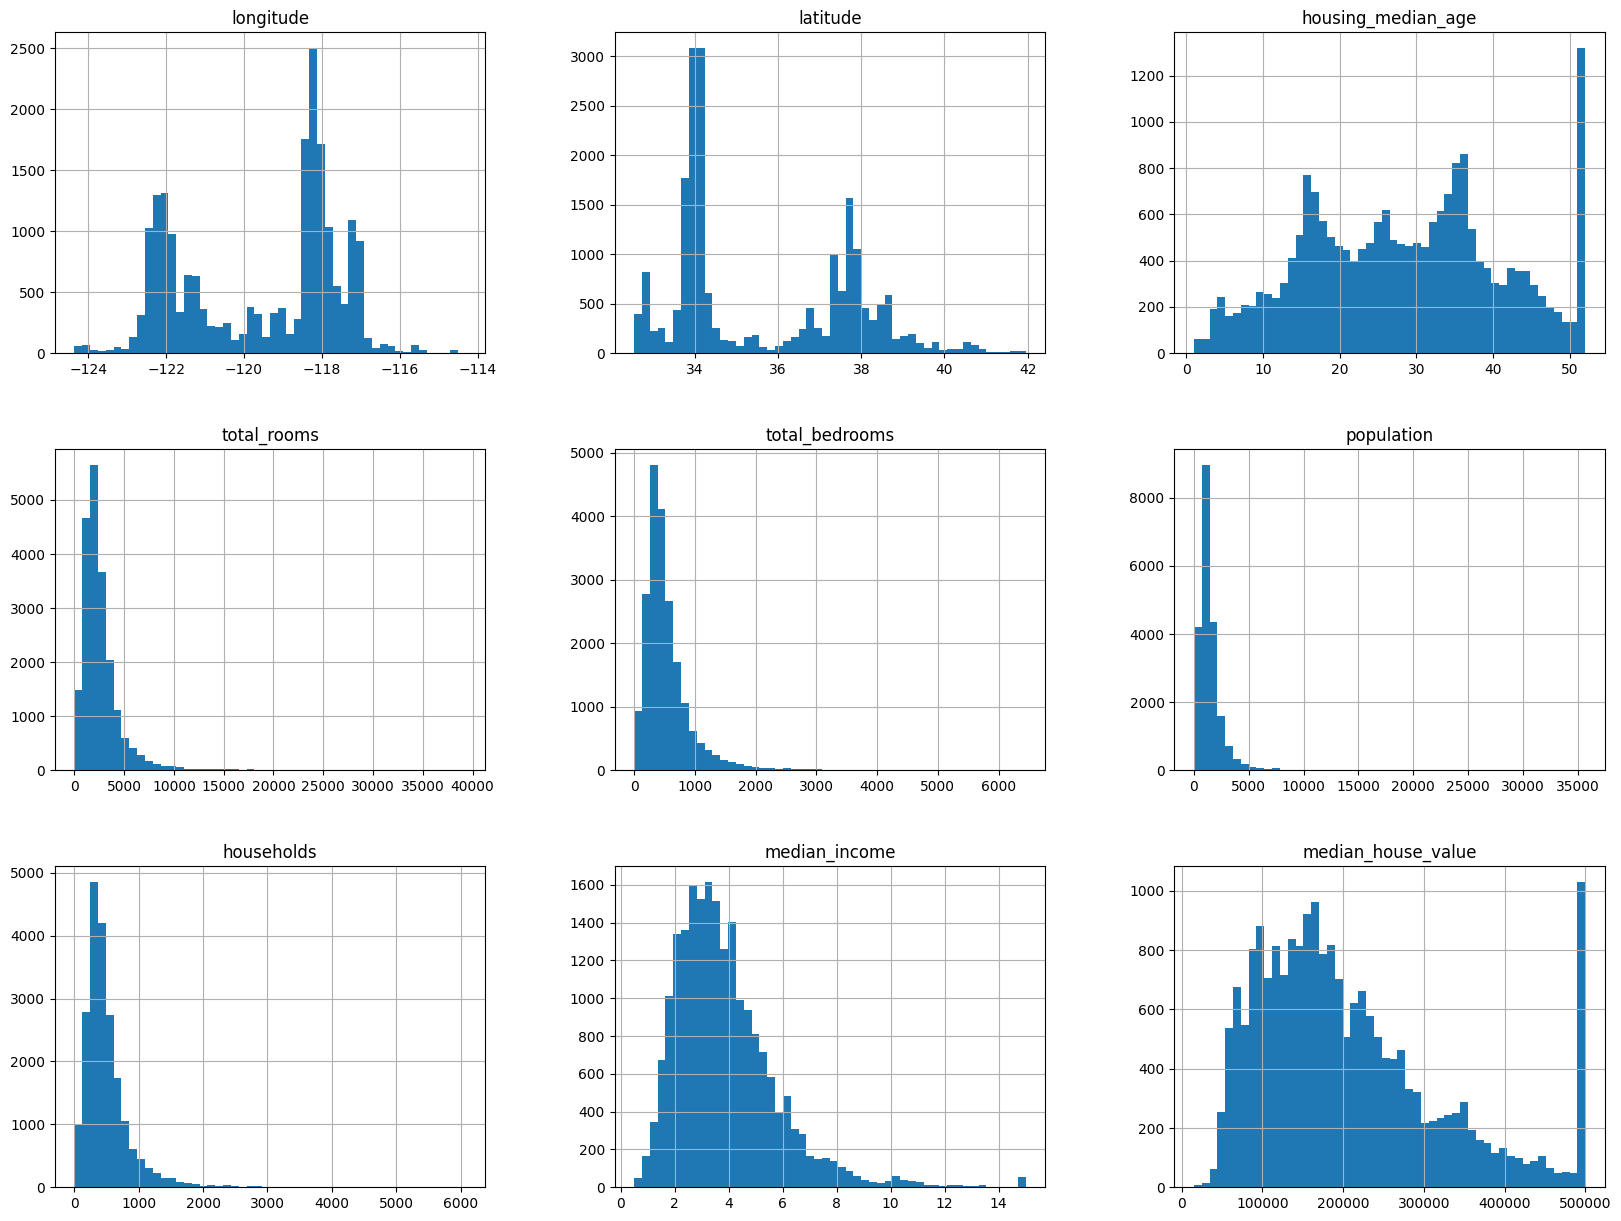

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
import numpy as np
np.random.seed(42)

In [13]:

def split_train_test(data, ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data)* ratio)
    test_indi = shuffled_indices[:test_size]
    train_indi = shuffled_indices[test_size:]
    return data.iloc[train_indi], data.iloc[test_indi]

In [14]:
train_set, test_set = split_train_test(housing, 0.2)

In [15]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [16]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


Every time you run split_train_test, you get diff data, and ml algo learns of complete data, and no more testing set left, it memorizes it.

 One solution is to save the test set on the first run and then load it in subsequent
 runs. Another option is to set the random number generator’s seed (e.g., with np.ran
 dom.seed(42))14 before calling np.random.permutation() so that it always generates
 the same shuffled indices.

 
 But both these solutions will break the next time you fetch an updated dataset. To
 have a stable train/test split even after updating the dataset, a common solution is to
 use each instance’s identifier to decide whether or not it should go in the test set
 (assuming instances have a unique and immutable identifier). For example, you could
 compute a hash of each instance’s identifier and put that instance in the test set if the
 hash is lower than or equal to 20% of the maximum hash value. This ensures that the
 test set will remain consistent across multiple runs, even if you refresh the dataset.
 The new test set will contain 20% of the new instances, but it will not contain any
 instance that was previously in the training set.

In [17]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [19]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [20]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [21]:
test_set.head()


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [22]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


We also try sklearn train_test_split, an in built one, (above is custom one), and then later a least bias one (if custom built carefully then it will have less sampling bias than that if sklearn)

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


<Axes: >

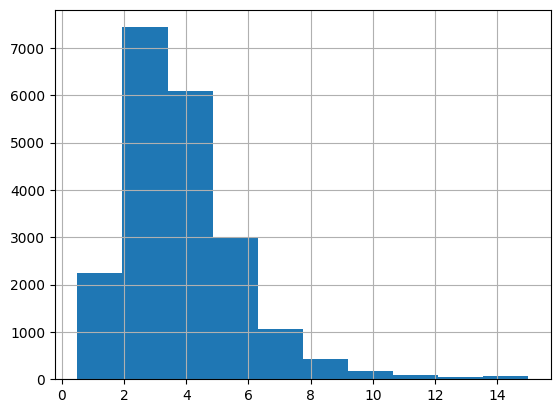

In [25]:
housing["median_income"].hist()
#housing["income_cat"].hist() #already did this and ran this later, lol

In [26]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<Axes: >

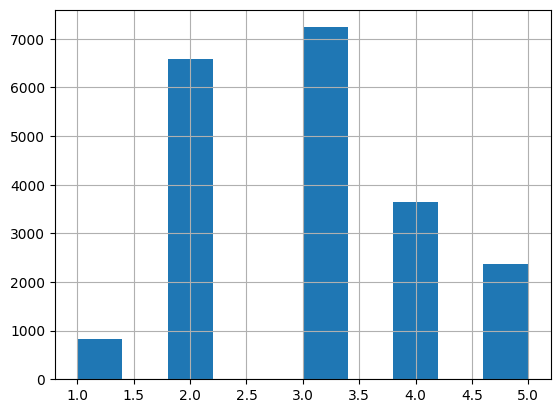

In [27]:
housing["income_cat"].hist()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
 strat_test_set["income_cat"].value_counts() / len(strat_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [30]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

Dropping that,..

<Axes: xlabel='longitude', ylabel='latitude'>

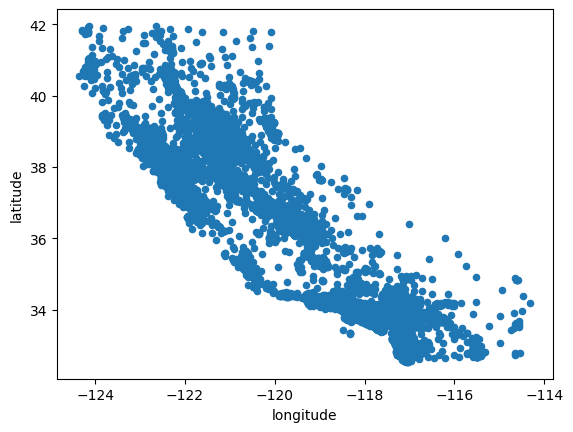

In [31]:
 housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

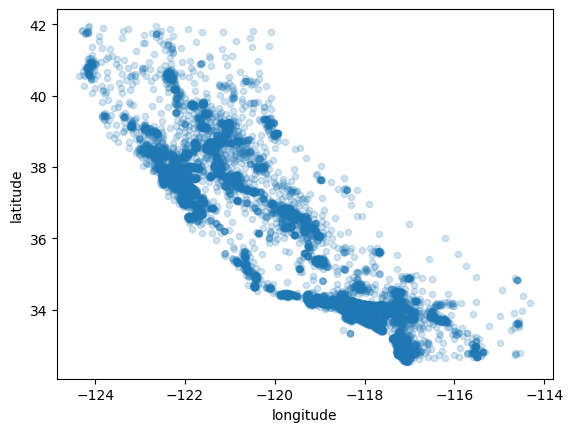

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2
            )

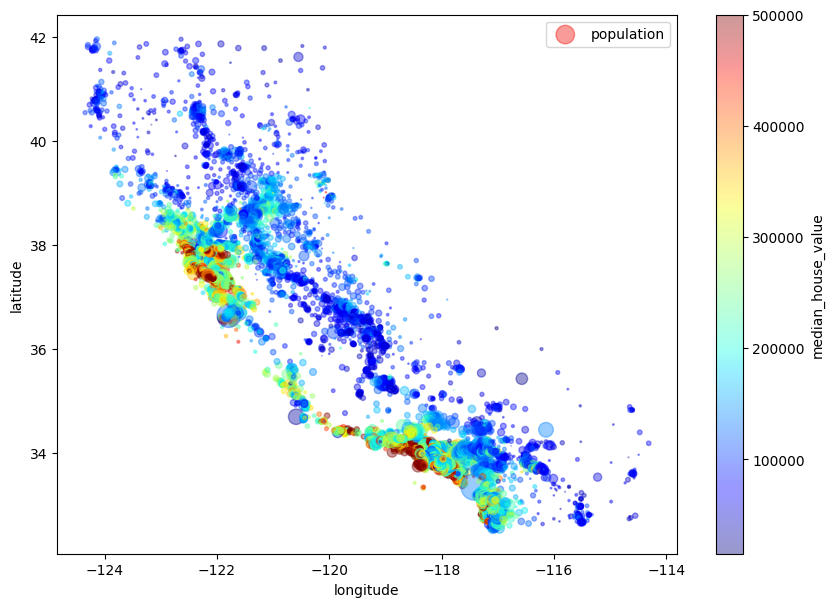

In [33]:
 housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
 )
 plt.legend()

colour-price, radius population

In [34]:
corr_matrix = housing.corr(numeric_only=True)


In [35]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

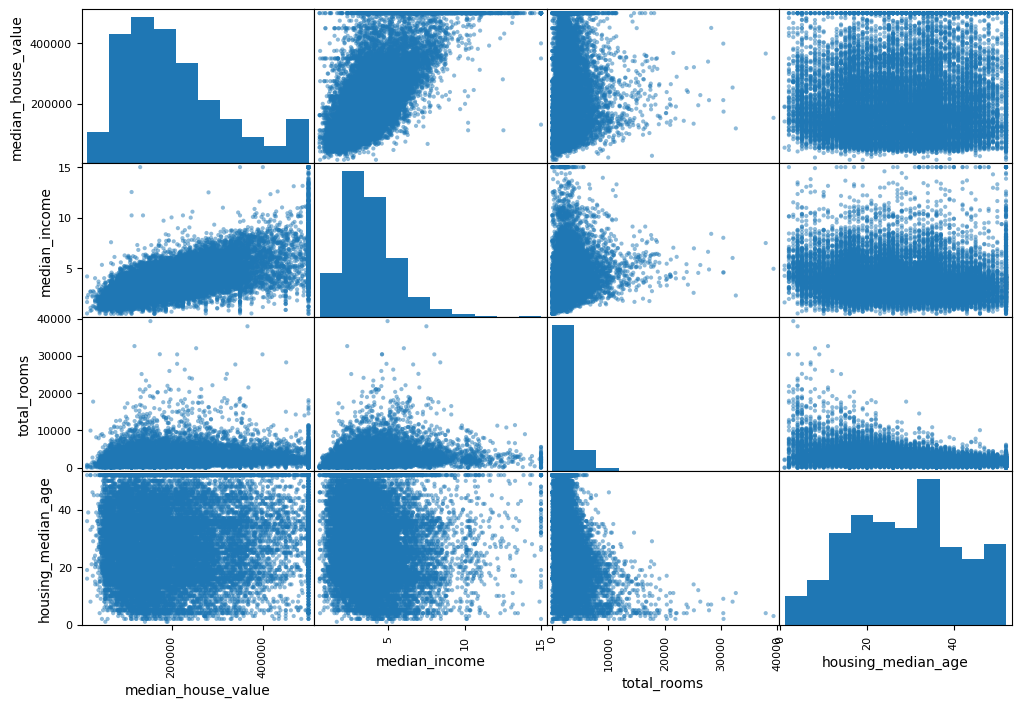

In [36]:
 from pandas.plotting import scatter_matrix
 attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
 scatter_matrix(housing[attributes], figsize=(12, 8))

 • This will allow you to reproduce these transformations easily on any dataset (e.g.,
 the next time you get a fresh dataset).

 
 • You will gradually build a library of transformation functions that you can reuse
 in future projects.

 
 • You can use these functions in your live system to transform the new data before
 feeding it to your algorithms


 • This will make it possible for you to easily try various transformations and see
 which combination of transformations works best

In [37]:
 housing = strat_train_set.drop("median_house_value", axis=1)

In [38]:
housing_labels = strat_train_set["median_house_value"].copy()

DATA CLEANING, total_bedrooms have some missing attribute, so let's do one of these : 1. get rid of whole attribute- column [use dropna], 2. get rid of those districts[use drop], 3. set some values to those missing ones (zeros, mean, median etc.)[use fillna], or simply use : scikit- SimpleImputer

In [39]:
 from sklearn.impute import SimpleImputer
 imputer = SimpleImputer(strategy="median")

BUT this only for numeric. So we do the below

In [40]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [41]:
 imputer.fit(housing_num) # this is fiiting imputer instance to the numeric type column containing data

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [42]:
 imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [43]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [44]:
X = imputer.transform(housing_num) # NumPy array with tranformed data (i.e., the replacing NaNs with median)

In [45]:
housing_train = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index) # using that and making it into a dataframe

In [46]:
 housing_cat = housing[["ocean_proximity"]]

In [47]:
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


Coverting them to numbers so they work better

In [48]:
 from sklearn.preprocessing import OrdinalEncoder
 ordinal_encoder = OrdinalEncoder()
 housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
 housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [49]:
 ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [50]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot # can use this too, i'm not using it here.

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

Custom Transformer

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [52]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [53]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


Feature Scaling - Min-Max, or Standardization

Transformation pipeLines, this above is manual, we are doing it with pipelines here...

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [55]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]], shape=(16512, 11))

In [56]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [57]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]], shape=(16512, 16))

In [58]:
housing_prepared.shape

(16512, 16)

TRAINING A MODEL

In [59]:
 from sklearn.linear_model import LinearRegression
 lin_reg = LinearRegression()
 lin_reg.fit(housing_prepared, housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
#trying out on a few instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [61]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [62]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [63]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

In [64]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.668609158005

In [65]:
#this value is very high, like error is 68k for houses generally ranging 120k to 250k???!!!

SO lin_reg is bad, let's train decision tree

In [66]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [67]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [68]:
# zero??, what if it's overfitting

VALIDATION - cross validation from scikitlearn

In [69]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [70]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


wow, worse that lin_reg

In [71]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180657


so overfitting it is.trying out random forests, Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions

In [72]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42) # estimators by default 100, but we still use it here.
forest_reg.fit(housing_prepared, housing_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18650.698705770003)

In [74]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [75]:
#better than those 2

Wow, this is much better: Random Forests look very promising. However, note that
 the score on the training set is still much lower than on the validation sets, meaning
 that the model is still overfitting the training set. Possible solutions for overfitting are
 to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.
 Before you dive much deeper into Random Forests, however, you should try out
 many other models from various categories of Machine Learning algorithms (e.g.,
 several Support Vector Machines with different kernels, and possibly a neural net
work), without spending too much time tweaking the hyperparameters. The goal is to
 shortlist a few (two to five) promising models.

 From book

In [76]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

In [77]:
#svm now, since rf does seem to have a small amount of overfitting

In [78]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

np.float64(111095.06635291966)

In [79]:
#support vector regression - like linear reg assumes linear, but doesn't do well with large datasets,
#and sensitive to feature scaling( but we used pipeline so that's not the issue here), it is way too bad based on rsme

Fine Tuning Model

In [80]:
#grid search (manually lenghty, so using scikit learns's) to find good hyperparameters for Random forest

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [30, 50, 70, 90], 'max_features': [6, 8, 10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"[{'max_features': [6, 8, ...], 'n_estimators': [30, 50, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,90


In [92]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 90}

In [93]:
grid_search.best_estimator_

,n_estimators,90
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [94]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49969.80441627874 {'max_features': 6, 'n_estimators': 30}
49713.78806095235 {'max_features': 6, 'n_estimators': 50}
49504.98377351441 {'max_features': 6, 'n_estimators': 70}
49383.9991057182 {'max_features': 6, 'n_estimators': 90}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
49547.0229085019 {'max_features': 8, 'n_estimators': 50}
49401.24492571461 {'max_features': 8, 'n_estimators': 70}
49312.74342776961 {'max_features': 8, 'n_estimators': 90}
50152.17503492269 {'max_features': 10, 'n_estimators': 30}
49774.245557689195 {'max_features': 10, 'n_estimators': 50}
49633.700523470754 {'max_features': 10, 'n_estimators': 70}
49611.61075876642 {'max_features': 10, 'n_estimators': 90}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimat

In [95]:
#since i got 8 and 30 as max, i'll try out other max 


In [96]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.988928,0.071169,0.036008,0.007425,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,11,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
1,3.172239,0.074088,0.057160,0.013008,6,50,NaN,"{'max_features': 6, 'n_estimators': 50}",-2.434073e+09,-2.407848e+09,...,-2.471461e+09,7.654734e+07,8,-3.573924e+08,-3.672109e+08,-3.659244e+08,-3.591152e+08,-3.592900e+08,-3.617866e+08,3.980531e+06
2,4.544964,0.151403,0.081711,0.008701,6,70,NaN,"{'max_features': 6, 'n_estimators': 70}",-2.411158e+09,-2.379716e+09,...,-2.450743e+09,8.291626e+07,4,-3.458652e+08,-3.544996e+08,-3.547652e+08,-3.465740e+08,-3.499879e+08,-3.503384e+08,3.773976e+06
3,5.795615,0.083314,0.111702,0.018375,6,90,NaN,"{'max_features': 6, 'n_estimators': 90}",-2.406487e+09,-2.365062e+09,...,-2.438779e+09,8.570841e+07,2,-3.401887e+08,-3.488556e+08,-3.494154e+08,-3.398453e+08,-3.430291e+08,-3.442668e+08,4.129819e+06
4,2.490985,0.093086,0.035560,0.006239,8,30,NaN,"{'max_features': 8, 'n_estimators': 30}",-2.492636e+09,-2.444818e+09,...,-2.489909e+09,7.086483e+07,10,-3.801679e+08,-3.832972e+08,-3.823818e+08,-3.778452e+08,-3.817589e+08,-3.810902e+08,1.916605e+06
5,4.163664,0.122626,0.063278,0.005102,8,50,NaN,"{'max_features': 8, 'n_estimators': 50}",-2.471052e+09,-2.362519e+09,...,-2.454907e+09,8.217683e+07,5,-3.613533e+08,-3.612193e+08,-3.661015e+08,-3.578990e+08,-3.592060e+08,-3.611558e+08,2.789679e+06
6,5.811431,0.113608,0.073253,0.003958,8,70,NaN,"{'max_features': 8, 'n_estimators': 70}",-2.458851e+09,-2.357242e+09,...,-2.440483e+09,7.924953e+07,3,-3.509348e+08,-3.526778e+08,-3.556047e+08,-3.478027e+08,-3.482700e+08,-3.510580e+08,2.887261e+06
7,7.410024,0.076676,0.113586,0.019383,8,90,NaN,"{'max_features': 8, 'n_estimators': 90}",-2.442763e+09,-2.336495e+09,...,-2.431747e+09,8.662493e+07,1,-3.467010e+08,-3.471306e+08,-3.503527e+08,-3.428128e+08,-3.416902e+08,-3.457375e+08,3.133808e+06
8,3.026166,0.081364,0.037480,0.004753,10,30,NaN,"{'max_features': 10, 'n_estimators': 30}",-2.472388e+09,-2.446087e+09,...,-2.515241e+09,7.216385e+07,12,-3.868233e+08,-3.864555e+08,-3.912084e+08,-3.811758e+08,-3.879791e+08,-3.867284e+08,3.241899e+06
9,5.278950,0.373622,0.060002,0.007734,10,50,NaN,"{'max_features': 10, 'n_estimators': 50}",-2.461400e+09,-2.397523e+09,...,-2.477476e+09,6.499695e+07,9,-3.646027e+08,-3.657112e+08,-3.694409e+08,-3.603929e+08,-3.650123e+08,-3.650320e+08,2.884623e+06


In [97]:
#grid search for few parameters only, randomized search for many as an iteration

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_features': <scipy.stats....00203BB5080E0>, 'n_estimators': <scipy.stats....00203BD2C6510>}"
,n_iter,10
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [99]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [100]:
#analysing best models

In [101]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.81776324e-02, 6.11445066e-02, 4.29865404e-02, 1.53079046e-02,
       1.48691637e-02, 1.53667285e-02, 1.44838601e-02, 3.79773356e-01,
       4.69378204e-02, 1.11131261e-01, 5.69216953e-02, 6.66304139e-03,
       1.60785862e-01, 8.89809146e-05, 2.27756725e-03, 3.08407977e-03])

In [103]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)
#check this one out!!!

[(np.float64(0.37977335553630287), 'median_income'),
 (np.float64(0.16078586174507625), 'INLAND'),
 (np.float64(0.11113126140001774), 'pop_per_hhold'),
 (np.float64(0.06817763243375036), 'longitude'),
 (np.float64(0.06114450657031347), 'latitude'),
 (np.float64(0.05692169531940428), 'bedrooms_per_room'),
 (np.float64(0.04693782044604555), 'rooms_per_hhold'),
 (np.float64(0.042986540358506374), 'housing_median_age'),
 (np.float64(0.015366728492549232), 'population'),
 (np.float64(0.01530790463165516), 'total_rooms'),
 (np.float64(0.014869163659556235), 'total_bedrooms'),
 (np.float64(0.014483860089031478), 'households'),
 (np.float64(0.0066630413879588445), '<1H OCEAN'),
 (np.float64(0.0030840797690023414), 'NEAR OCEAN'),
 (np.float64(0.002277567246205908), 'NEAR BAY'),
 (np.float64(8.898091462402514e-05), 'ISLAND')]

Test Set

In [104]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [105]:
final_rmse

np.float64(47260.75515752352)

Computing 95 percent confidence interval

In [106]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([45275.91745078, 49165.52913485])

In [107]:
#same thing manually

In [108]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(np.float64(45275.91745077567), np.float64(49165.52913484528))

In [109]:
#using z scores rather than t scores

In [110]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(np.float64(45276.512315726235), np.float64(49164.98132454301))

DONE !!!

In [111]:
final_rmse = np.sqrt(final_mse)


In [113]:
from sklearn.metrics import mean_absolute_error, r2_score

final_mae = mean_absolute_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)
print("MSE:", final_mse)
print("RMSE:", final_rmse)
print("MAE:", final_mae)
print("R² Score:", final_r2)


MSE: 2233578978.0593863
RMSE: 47260.75515752352
MAE: 31350.109609173127
R² Score: 0.8286232451437912


With all metrics for regression